# 按飛行時間分類

**飛行時間組合出現的次數**

In [2]:
import pandas as pd
import numpy as np

# 讀取資料
data_path = '/Users/yuchingchen/Documents/專題/cleaned_data/tokyo.csv'
df = pd.read_csv(data_path)

# 計算飛行時間組合出現次數
flight_time_combinations_count = df['飛行時間'].value_counts()

# 將結果轉為 DataFrame，方便查看
result_df = flight_time_combinations_count.reset_index()
result_df.columns = ['飛行時間', '出現次數']

# 排序按次數降序排列
result_df = result_df.sort_values(by='出現次數', ascending=False).reset_index(drop=True)
print(result_df)

# 對所有數據取對數
df['平均價格_log'] = df['平均價格'].apply(lambda x: np.log1p(x) if x > 0 else 0)
df['最低價格_log'] = df['最低價格'].apply(lambda x: np.log1p(x) if x > 0 else 0)
df['中位數價格_log'] = df['中位數價格'].apply(lambda x: np.log1p(x) if x > 0 else 0)
df['價格變異_log'] = df['價格變異'].apply(lambda x: np.log1p(x) if x > 0 else 0)
df["最低價格剩餘天數_inv"] = df["最低價格剩餘天數"].apply(lambda x: 1/x if pd.notnull(x) and x != 0 else np.nan)

# 移除包含 NaN 的數據
plot_data = df.dropna(subset=["平均價格_log", "最低價格_log", "最低價格剩餘天數_inv", "價格變異_log", "中位數價格_log", "飛行時間"])

         飛行時間  出現次數
0        3 小時   481
1   3 小時 5 分鐘   399
2  2 小時 50 分鐘   335
3  3 小時 15 分鐘    48
4  2 小時 55 分鐘    24


**處理後：Boxplot（按飛行時間分類）**

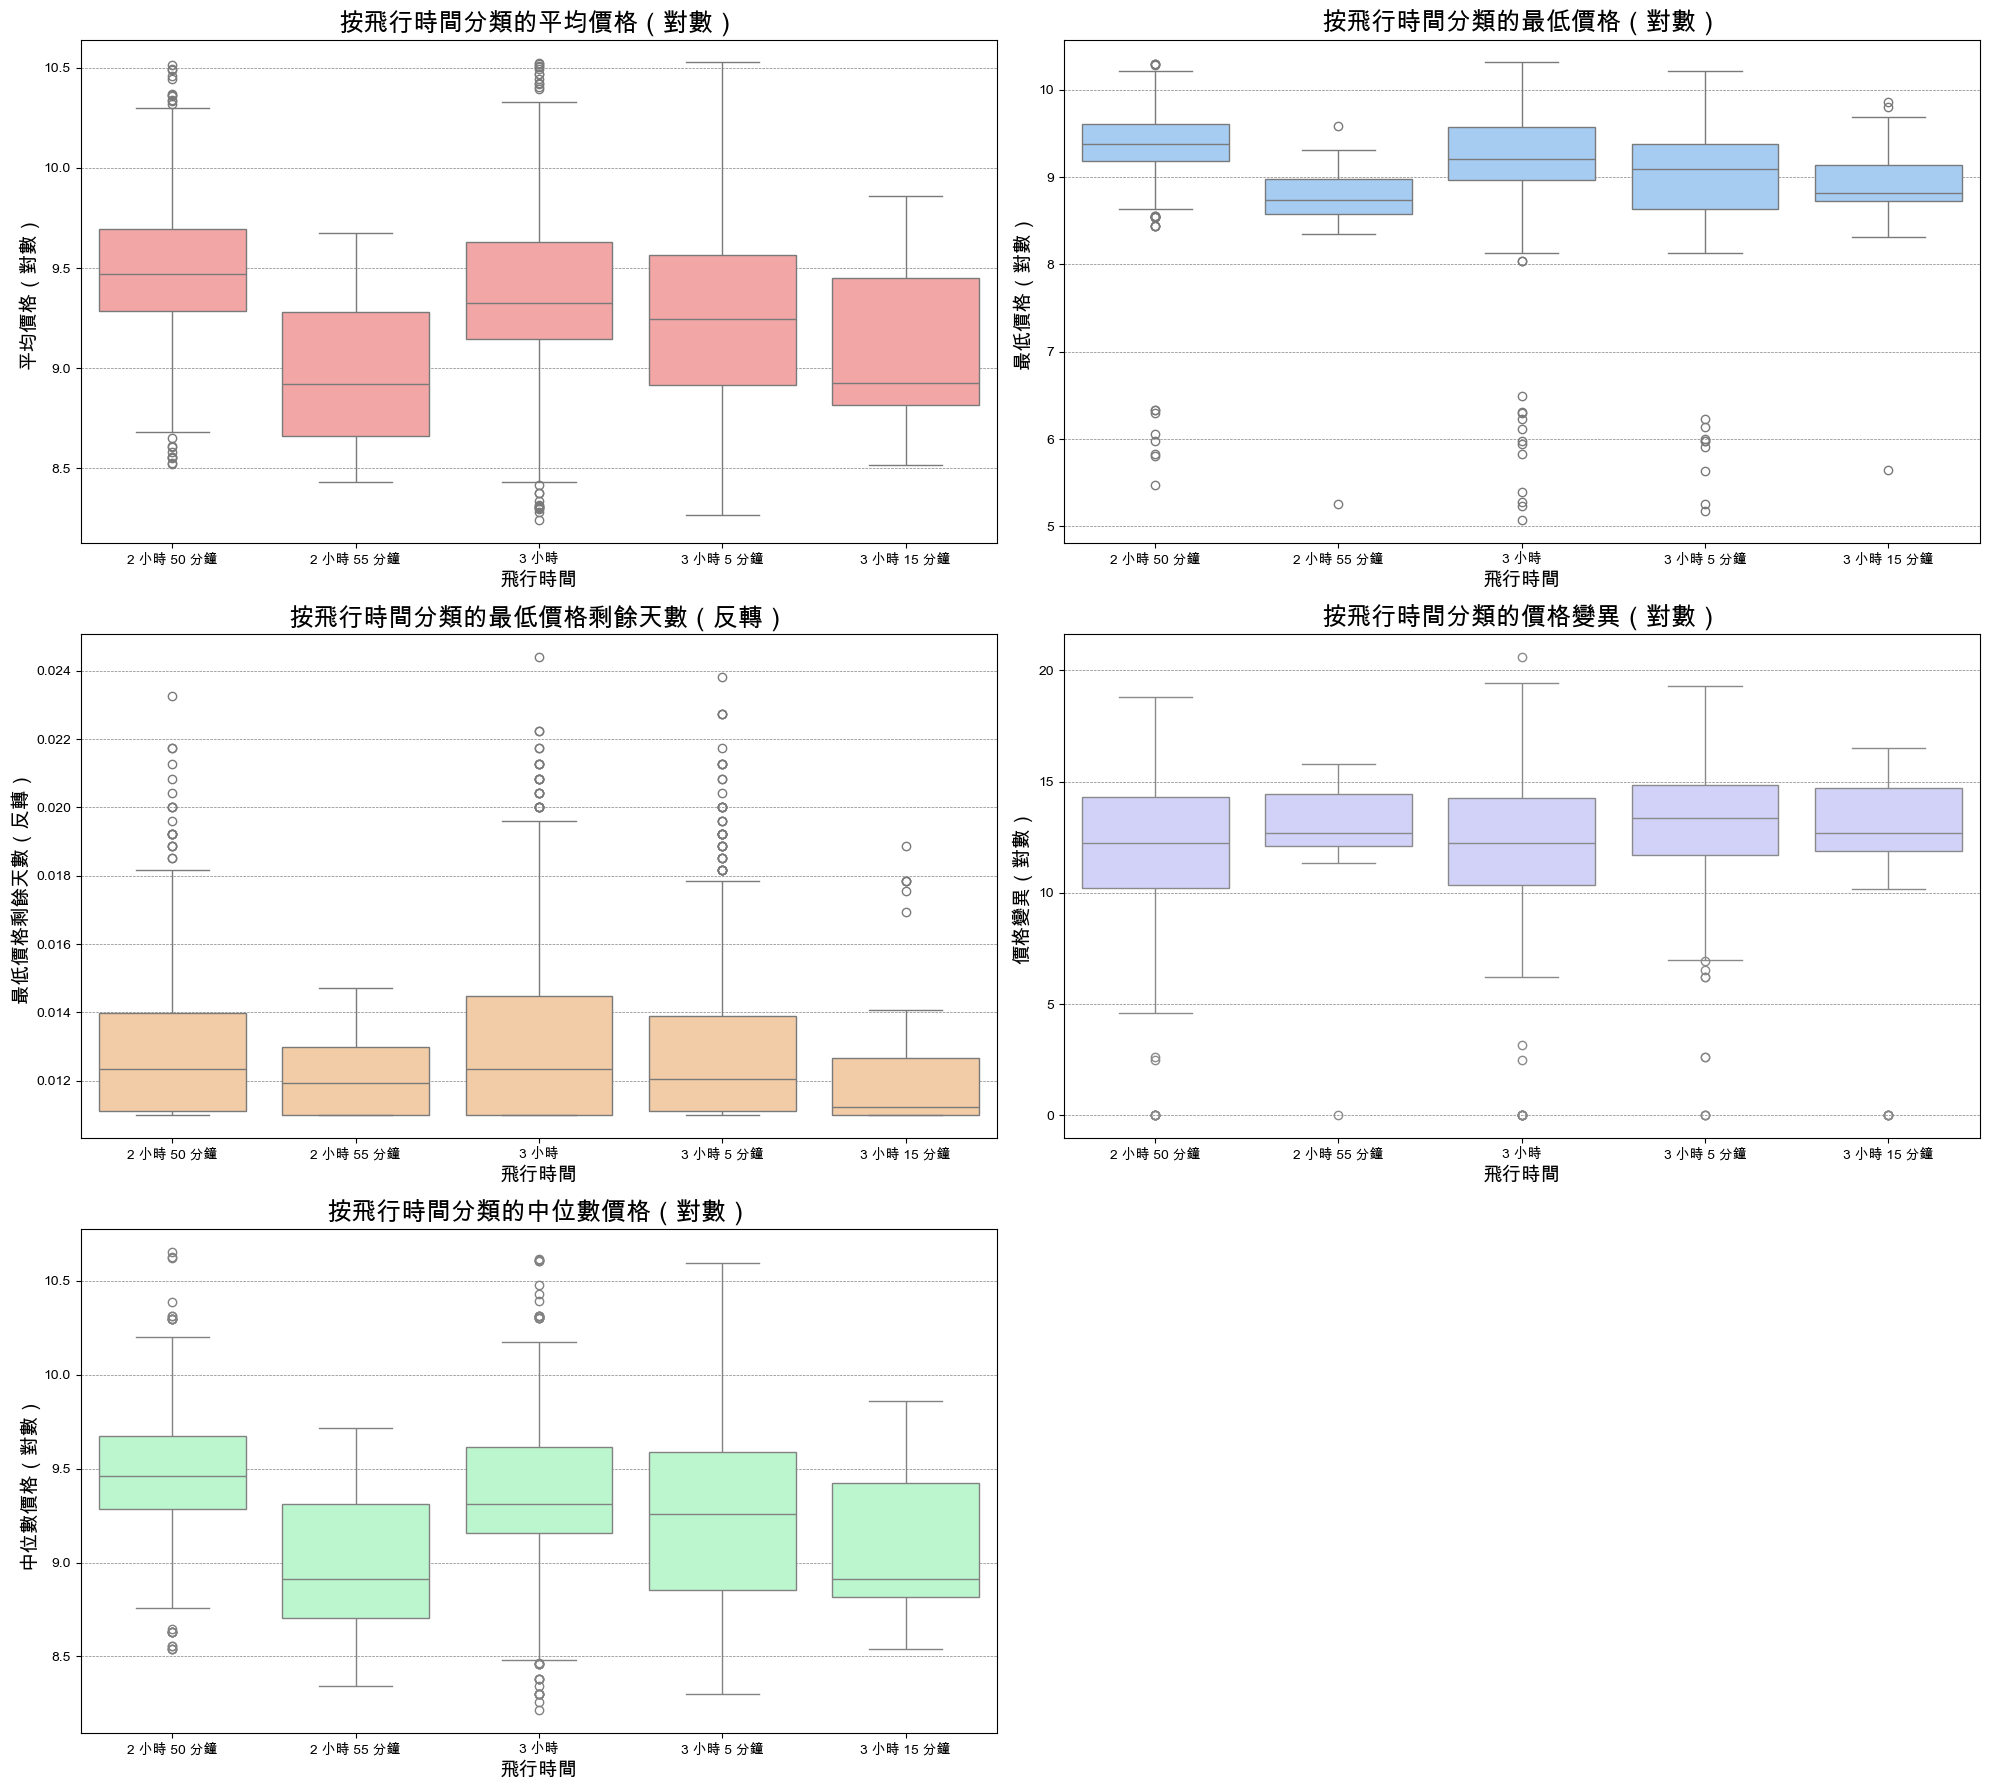

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 繁體中文設定
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 設定排序順序
plot_data['飛行時間'] = pd.Categorical(
    plot_data['飛行時間'],
    categories=['2 小時 50 分鐘', '2 小時 55 分鐘', '3 小時', '3 小時 5 分鐘', '3 小時 15 分鐘'],
    ordered=True
)

# 創建子圖，分別繪製對數轉換後的盒狀圖
fig, axes = plt.subplots(3, 2, figsize=(20, 18))  # 更新為 3x2 網格

# 調整圖表標題字體大小
title_fontsize = 18
label_fontsize = 14

# 第一個子圖：按飛行時間分類的平均價格的盒狀圖（對數）
sns.boxplot(data=plot_data, x='飛行時間', y='平均價格_log', ax=axes[0, 0], color='#FF9999')
axes[0, 0].set_title('按飛行時間分類的平均價格（對數）', fontsize=title_fontsize)
axes[0, 0].set_xlabel('飛行時間', fontsize=label_fontsize)
axes[0, 0].set_ylabel('平均價格（對數）', fontsize=label_fontsize)
axes[0, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第二個子圖：按飛行時間分類的最低價格的盒狀圖（對數）
sns.boxplot(data=plot_data, x='飛行時間', y='最低價格_log', ax=axes[0, 1], color='#99CCFF')
axes[0, 1].set_title('按飛行時間分類的最低價格（對數）', fontsize=title_fontsize)
axes[0, 1].set_xlabel('飛行時間', fontsize=label_fontsize)
axes[0, 1].set_ylabel('最低價格（對數）', fontsize=label_fontsize)
axes[0, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第三個子圖：按飛行時間分類的最低價格剩餘天數（反轉）的盒狀圖
sns.boxplot(data=plot_data, x='飛行時間', y='最低價格剩餘天數_inv', ax=axes[1, 0], color='#FFCC99')
axes[1, 0].set_title('按飛行時間分類的最低價格剩餘天數（反轉）', fontsize=title_fontsize)
axes[1, 0].set_xlabel('飛行時間', fontsize=label_fontsize)
axes[1, 0].set_ylabel('最低價格剩餘天數（反轉）', fontsize=label_fontsize)
axes[1, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第四個子圖：按飛行時間分類的價格變異（對數）的盒狀圖
sns.boxplot(data=plot_data, x='飛行時間', y='價格變異_log', ax=axes[1, 1], color='#CCCCFF')
axes[1, 1].set_title('按飛行時間分類的價格變異（對數）', fontsize=title_fontsize)
axes[1, 1].set_xlabel('飛行時間', fontsize=label_fontsize)
axes[1, 1].set_ylabel('價格變異（對數）', fontsize=label_fontsize)
axes[1, 1].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 第五個子圖：按飛行時間分類的中位數價格（對數）的盒狀圖
sns.boxplot(data=plot_data, x='飛行時間', y='中位數價格_log', ax=axes[2, 0], color='#B3FFCC')
axes[2, 0].set_title('按飛行時間分類的中位數價格（對數）', fontsize=title_fontsize)
axes[2, 0].set_xlabel('飛行時間', fontsize=label_fontsize)
axes[2, 0].set_ylabel('中位數價格（對數）', fontsize=label_fontsize)
axes[2, 0].grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

# 移除未使用的子圖
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

**Kruskal-Wallis H Test**

In [6]:
import pandas as pd
from scipy.stats import kruskal

# 提取需要分析的數據
anova_data = df[['飛行時間', '平均價格_log', '最低價格_log', '中位數價格_log', '價格變異_log', '最低價格剩餘天數_inv']].dropna()

# Kruskal-Wallis 檢測函數
def perform_kruskal(data, response_var):
    # 分組數據
    groups = [data[data['飛行時間'] == flight_time][response_var] for flight_time in data['飛行時間'].unique()]
    if any(len(group) < 2 for group in groups):  # 確保每組至少有2個數據
        return None, None
    stat, p_value = kruskal(*groups)
    return stat, p_value

# 儲存檢測結果
results = []

# 分別對每個變量進行檢測
for var in ['平均價格_log', '最低價格_log', '中位數價格_log', '價格變異_log', '最低價格剩餘天數_inv']:
    stat, p_value = perform_kruskal(anova_data, var)
    results.append({
        "變數": var,
        "H-statistic": stat,
        "p-value": p_value,
        "顯著性": "顯著" if p_value and p_value < 0.05 else "不顯著"
    })

# 將結果轉為 DataFrame 以便查看
results_df = pd.DataFrame(results)

# 顯示結果
print(results_df)

             變數  H-statistic       p-value 顯著性
0      平均價格_log    85.898416  9.780186e-18  顯著
1      最低價格_log   119.431382  7.064897e-25  顯著
2     中位數價格_log    85.027365  1.496815e-17  顯著
3      價格變異_log    28.386183  1.041513e-05  顯著
4  最低價格剩餘天數_inv    10.903868  2.766592e-02  顯著


**Tukey HSD**

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
2 小時 50 分鐘 2 小時 55 分鐘  -0.5329    0.0 -0.7971 -0.2687   True
2 小時 50 分鐘       3 小時  -0.1495    0.0 -0.2384 -0.0605   True
2 小時 50 分鐘 3 小時 15 分鐘  -0.3868    0.0 -0.5798 -0.1939   True
2 小時 50 分鐘  3 小時 5 分鐘  -0.2479    0.0 -0.3406 -0.1553   True
2 小時 55 分鐘       3 小時   0.3834 0.0006   0.122  0.6449   True
2 小時 55 分鐘 3 小時 15 分鐘   0.1461 0.7057 -0.1665  0.4586  False
2 小時 55 分鐘  3 小時 5 分鐘    0.285 0.0258  0.0222  0.5477   True
      3 小時 3 小時 15 分鐘  -0.2374 0.0057 -0.4266 -0.0482   True
      3 小時  3 小時 5 分鐘  -0.0985 0.0132 -0.1831 -0.0138   True
3 小時 15 分鐘  3 小時 5 分鐘   0.1389 0.2729 -0.0521  0.3299  False
------------------------------------------------------------


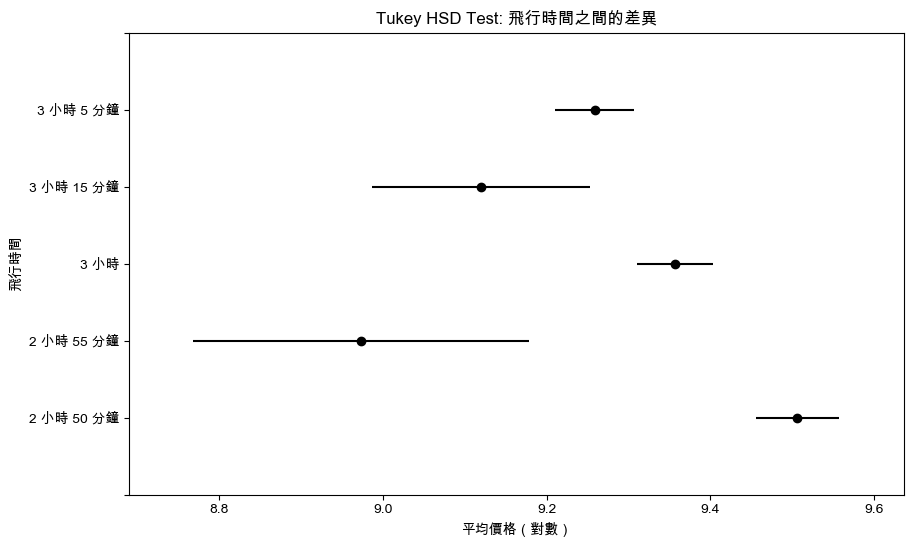

In [5]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 執行 Tukey HSD 測試
tukey = pairwise_tukeyhsd(endog=anova_data['平均價格_log'], groups=anova_data['飛行時間'], alpha=0.05)

# 輸出測試結果
print(tukey)

# 繪製 Tukey HSD 結果
tukey.plot_simultaneous()
plt.title('Tukey HSD Test: 飛行時間之間的差異')
plt.xlabel('平均價格（對數）')
plt.ylabel('飛行時間')
plt.show()